# Customer Churn Analysis

### Main Objective

The primary goal of this analysis is to predict customer churn using machine learning models.

### Load and Preprocess Dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'churndata_processed.csv'
df = pd.read_csv(file_path)

# Data preparation: assuming the 'multiple' column is the target
X = df.drop('churn_value', axis=1)
y = df['churn_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training and Hyperparameter Tuning with GridSearchCV

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define parameter grids for GridSearchCV
log_reg_params = {'C': [0.1, 1], 'solver': ['liblinear']}
rf_params = {'n_estimators': [50, 100], 'max_depth': [10, None]}
gb_params = {'learning_rate': [0.01, 0.1], 'n_estimators': [50, 100]}

# Perform GridSearchCV for each model
# Logistic Regression
log_reg_cv = GridSearchCV(LogisticRegression(random_state=42), log_reg_params, cv=3)
log_reg_cv.fit(X_train_scaled, y_train)

# Random Forest
rf_cv = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3)
rf_cv.fit(X_train_scaled, y_train)

# Gradient Boosting
gb_cv = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=3)
gb_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1],
                         'n_estimators': [50, 100]})

### Model Evaluation

In [3]:
# Best estimators from the grid search
log_reg_best = log_reg_cv.best_estimator_
rf_best = rf_cv.best_estimator_
gb_best = gb_cv.best_estimator_

# Predictions using the best models
y_pred_log_best = log_reg_best.predict(X_test_scaled)
y_pred_rf_best = rf_best.predict(X_test_scaled)
y_pred_gb_best = gb_best.predict(X_test_scaled)

# Classification reports for the best models
log_report_best = classification_report(y_test, y_pred_log_best)
rf_report_best = classification_report(y_test, y_pred_rf_best)
gb_report_best = classification_report(y_test, y_pred_gb_best)

print("\n", log_report_best, "\nAccuracy of LR: ", accuracy_score(y_test, y_pred_log_best))
print("\n", rf_report_best, "\nAccuracy of RF: ", accuracy_score(y_test, y_pred_rf_best))
print("\n", gb_report_best, "\nAccuracy of GB: ", accuracy_score(y_test, y_pred_gb_best))



               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1524
           1       0.93      0.87      0.90       589

    accuracy                           0.95      2113
   macro avg       0.94      0.93      0.93      2113
weighted avg       0.95      0.95      0.95      2113
 
Accuracy of LR:  0.9474680548982489

               precision    recall  f1-score   support

           0       0.94      0.98      0.96      1524
           1       0.96      0.84      0.90       589

    accuracy                           0.95      2113
   macro avg       0.95      0.91      0.93      2113
weighted avg       0.95      0.95      0.94      2113
 
Accuracy of RF:  0.9451017510648367

               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1524
           1       0.94      0.86      0.90       589

    accuracy                           0.95      2113
   macro avg       0.95      0.92      0.93     

### Model Evaluation using Confusion Matrices and ROC Curves

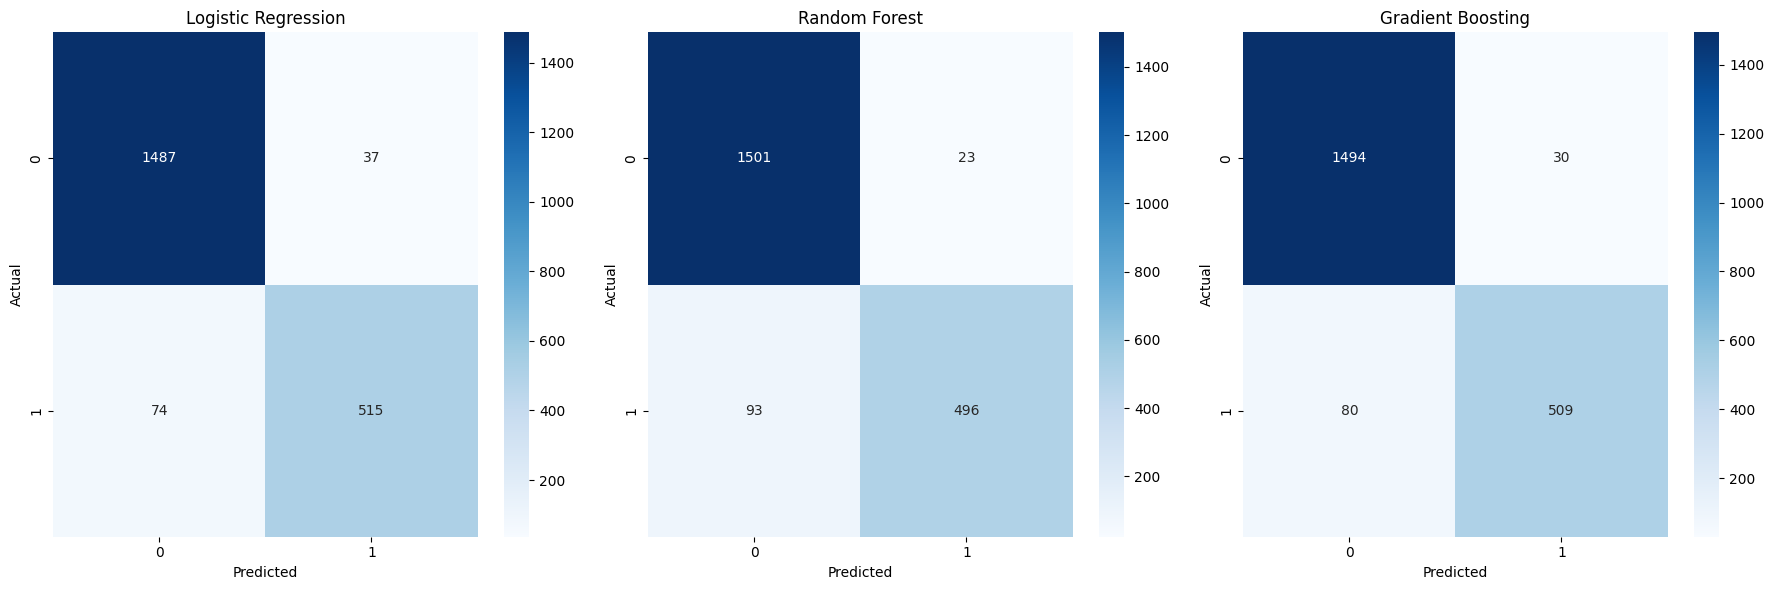

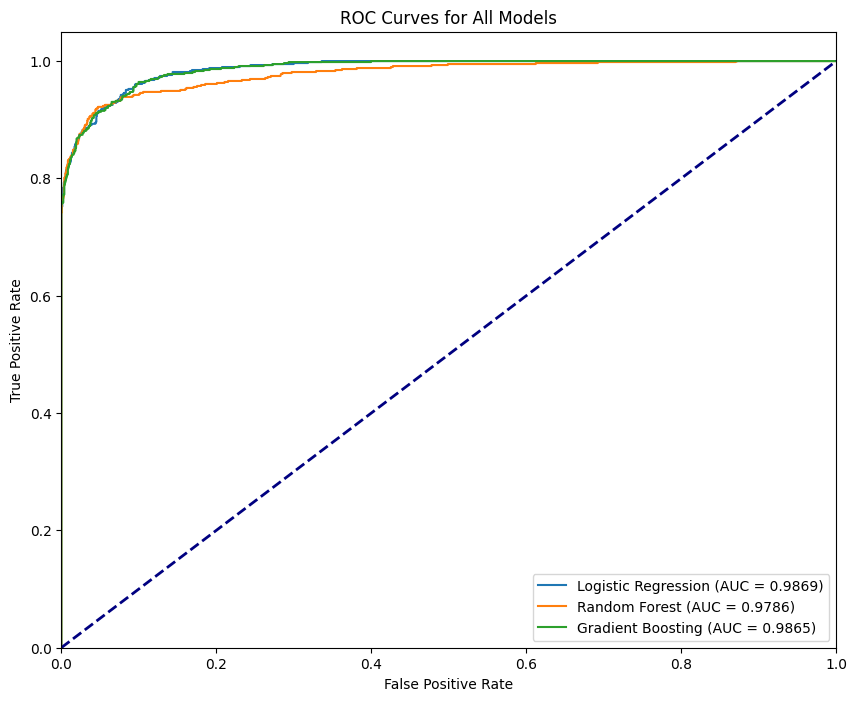

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

# Confusion Matrices for all models in a single plot
def plot_confusion_matrices(y_true, y_pred_log, y_pred_rf, y_pred_gb):
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    
    # Logistic Regression
    cm_log = confusion_matrix(y_true, y_pred_log)
    sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=ax[0])
    ax[0].set_title('Logistic Regression')
    ax[0].set_xlabel('Predicted')
    ax[0].set_ylabel('Actual')
    
    # Random Forest
    cm_rf = confusion_matrix(y_true, y_pred_rf)
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=ax[1])
    ax[1].set_title('Random Forest')
    ax[1].set_xlabel('Predicted')
    ax[1].set_ylabel('Actual')
    
    # Gradient Boosting
    cm_gb = confusion_matrix(y_true, y_pred_gb)
    sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', ax=ax[2])
    ax[2].set_title('Gradient Boosting')
    ax[2].set_xlabel('Predicted')
    ax[2].set_ylabel('Actual')
    
    plt.tight_layout()
    plt.show()

# Plot all confusion matrices
plot_confusion_matrices(y_test, y_pred_log_best, y_pred_rf_best, y_pred_gb_best)

# ROC Curves for all models in a single plot
def plot_roc_curves(y_true, y_proba_log, y_proba_rf, y_proba_gb):
    plt.figure(figsize=(10, 8))
    
    # Logistic Regression
    fpr_log, tpr_log, _ = roc_curve(y_true, y_proba_log)
    roc_auc_log = auc(fpr_log, tpr_log)
    plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.4f})')
    
    # Random Forest
    fpr_rf, tpr_rf, _ = roc_curve(y_true, y_proba_rf)
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
    
    # Gradient Boosting
    fpr_gb, tpr_gb, _ = roc_curve(y_true, y_proba_gb)
    roc_auc_gb = auc(fpr_gb, tpr_gb)
    plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.4f})')
    
    # Plot settings
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for All Models')
    plt.legend(loc="lower right")
    plt.show()

# Get predicted probabilities for ROC curves
y_proba_log_best = log_reg_best.predict_proba(X_test_scaled)[:, 1]
y_proba_rf_best = rf_best.predict_proba(X_test_scaled)[:, 1]
y_proba_gb_best = gb_best.predict_proba(X_test_scaled)[:, 1]

# Plot all ROC curves
plot_roc_curves(y_test, y_proba_log_best, y_proba_rf_best, y_proba_gb_best)

### Feature Importance

In [5]:
# Feature importances from Random Forest
rf_feature_importances = pd.DataFrame({
    'Feature': X.columns, 
    'Importance': rf_best.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the top features
rf_feature_importances.head()

,Feature,Importance
11,satisfaction,0.667341
8,contract,0.083174
10,monthly,0.043846
0,months,0.043104
2,gb_mon,0.034950


In [6]:
# Feature importances from Gradient Boosting
gb_feature_importances = pd.DataFrame({
'Feature': X.columns, 
'Importance': gb_best.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the top features
gb_feature_importances.head()

,Feature,Importance
11,satisfaction,0.919712
3,security,0.024793
8,contract,0.022950
0,months,0.011568
10,monthly,0.010091
